# Images and Colors

The purpose of this assignment is to get some practice analyzing color distributions of images.

To do this, you will need to grab 3 images from the web using `wget` -- see the Lab for this week for a walk through for how to do this.

### Reminder prompt (see main prompt for more details)
Pick 3 of your own images from the web (you can use your own photos as long as they are on the web with a public URL) and create a visualization that shows how similar/different these images are using these histogramming methods.

You are free to choose 3 images that look "similar" to you or very different and describe how mapping them into color space (i.e. showing their color distribution) either confirms or negates these differences or similarities.  (For example, let's say you choose a painting of a beach and a photo of a beach their color spaces might look very different although they are representations of similar objects). You may also want to choose a set of images that you like and those you don't like to see if there are any differences due to color choices.

Fill in your code in the cells below and hit "Save & Grade" on the main prompt when you are finished -- the instructional team will then grade your assignment.

## Import Libraries ##

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-fldidktw because the default path (/tmp/cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Preparing Images & Data ##

### image 1 upload ###

In [2]:
#Image1 is uploaded
!wget https://ih1.redbubble.net/image.2737538918.9548/bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg

--2023-09-15 17:00:19--  https://ih1.redbubble.net/image.2737538918.9548/bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg
Resolving ih1.redbubble.net (ih1.redbubble.net)... 72.21.91.237
Connecting to ih1.redbubble.net (ih1.redbubble.net)|72.21.91.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40975 (40K) [image/jpeg]
Saving to: ‘bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg.1’

bg,f8f8f8-flat,750x 100%[===================>]  40.01K  --.-KB/s    in 0s      

2023-09-15 17:00:19 (248 MB/s) - ‘bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg.1’ saved [40975/40975]



### image 2 upload ###

In [3]:
#Image2 is uploaded
!wget https://pnghq.com/wp-content/uploads/pnghq.com-rilakkuma-bear-transparent-background-png-329x400.png

--2023-09-15 17:00:19--  https://pnghq.com/wp-content/uploads/pnghq.com-rilakkuma-bear-transparent-background-png-329x400.png
Resolving pnghq.com (pnghq.com)... 172.67.212.13, 104.21.16.120, 2606:4700:3035::6815:1078, ...
Connecting to pnghq.com (pnghq.com)|172.67.212.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90828 (89K) [image/png]
Saving to: ‘pnghq.com-rilakkuma-bear-transparent-background-png-329x400.png.1’

pnghq.com-rilakkuma 100%[===================>]  88.70K  --.-KB/s    in 0.01s   

2023-09-15 17:00:20 (8.43 MB/s) - ‘pnghq.com-rilakkuma-bear-transparent-background-png-329x400.png.1’ saved [90828/90828]



### image 3 upload ###

In [4]:
#Image3 is uploaded
!wget https://png.pngitem.com/pimgs/s/526-5265473_aesthetic-rilakkuma-kawaii-rilakkuma-bear-hd-png-download.png

--2023-09-15 17:00:21--  https://png.pngitem.com/pimgs/s/526-5265473_aesthetic-rilakkuma-kawaii-rilakkuma-bear-hd-png-download.png
Resolving png.pngitem.com (png.pngitem.com)... 154.197.160.69
Connecting to png.pngitem.com (png.pngitem.com)|154.197.160.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33479 (33K) [image/png]
Saving to: ‘526-5265473_aesthetic-rilakkuma-kawaii-rilakkuma-bear-hd-png-download.png.1’

526-5265473_aesthet 100%[===================>]  32.69K  --.-KB/s    in 0.1s    

2023-09-15 17:00:21 (238 KB/s) - ‘526-5265473_aesthetic-rilakkuma-kawaii-rilakkuma-bear-hd-png-download.png.1’ saved [33479/33479]



### load in image1 ###

In [5]:
img1 = Image.open('bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg')

### load in image2 ###

In [6]:
img2 = Image.open('pnghq.com-rilakkuma-bear-transparent-background-png-329x400.png')

### load in image3 ###

In [7]:
img3 = Image.open('526-5265473_aesthetic-rilakkuma-kawaii-rilakkuma-bear-hd-png-download.png')

## Display 3 images ##

### image 1 ###

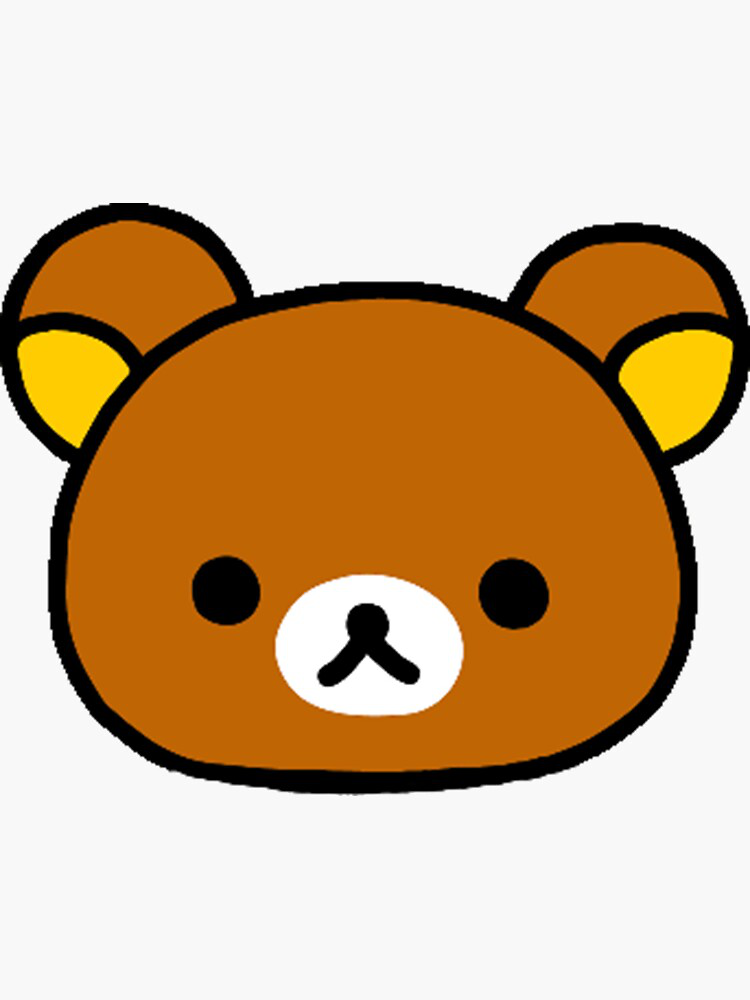

In [8]:
img1

### image 2 ###

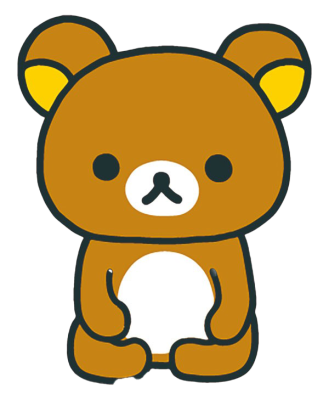

In [9]:
img2

### image 3 ###

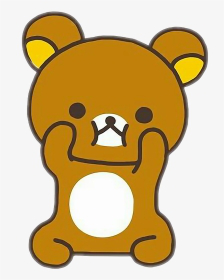

In [10]:
img3

## Image to Array ##

In [11]:
im1_data = np.array(img1) #for img1
im2_data = np.array(img2) #for img2
im3_data = np.array(img3) #for img3

In [12]:
im1_data.shape

(1000, 750, 3)

In [13]:
im2_data.shape

(400, 329, 4)

In [14]:
im3_data.shape

(280, 224, 3)

In [15]:
# print the unique elements in each channel
channel_labels_1 = ['R', 'G', 'B']
for i in range(im1_data.shape[2]):
    print('channel=', channel_labels_1[i], 
          'unique values=', np.unique( im1_data[:,:,i] ) )

channel= R unique values= [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 

In [16]:
channel_labels_2 = ['R', 'G', 'B', 'A']
for i in range(im2_data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels_2[i], 
          'unique values=', np.unique( im2_data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [  0  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31
  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 

In [17]:
channel_labels_3 = ['R', 'G', 'B']
for i in range(im3_data.shape[2]): # this loops over the last entry of the shape array, so the #4
    print('channel=', channel_labels_3[i], 
          'unique values=', np.unique( im3_data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [ 38  40  41  42  44  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]
channel= G unique values= [ 32  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  

## Transparency Check ##

### for image1 ###

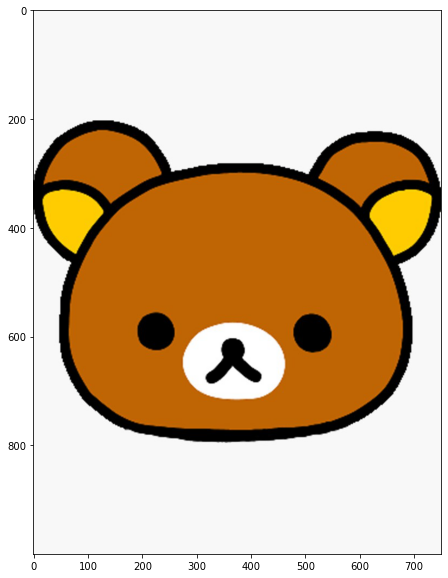

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_facecolor('gray')

ax.imshow(im1_data)

plt.show()

### for image 2 ###

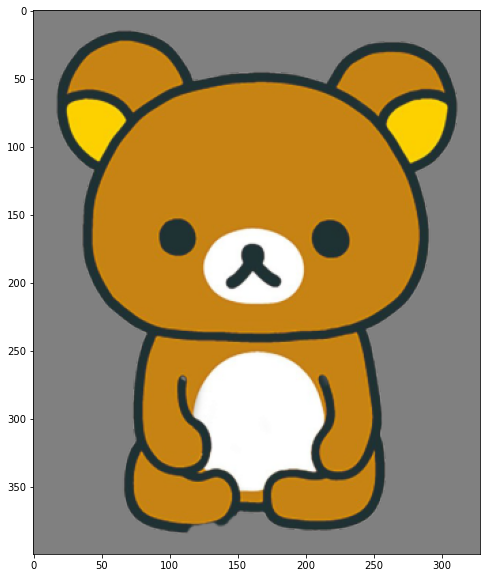

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_facecolor('gray')

ax.imshow(im2_data)

plt.show()

#it is a transparent image

### for image 3 ###

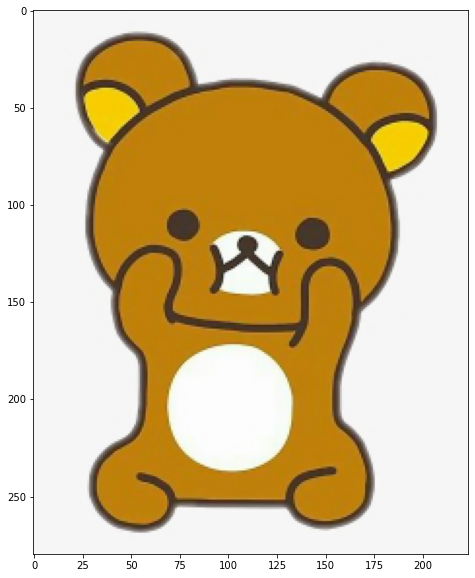

In [20]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_facecolor('gray')

ax.imshow(im3_data)

plt.show()

## Color Distribution Histograms and Discussions ##

### Color distribution for Image #1 ###

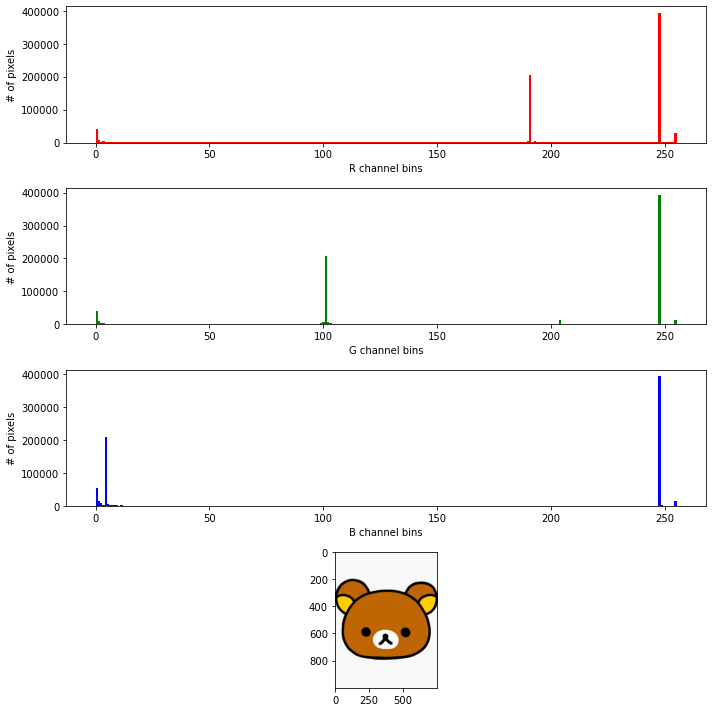

In [21]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im1_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im1_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im1_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im1_data)

fig.tight_layout()
plt.show()

### Image 1 Discussion ###

- The first image is a simple one since it only contains the head part of the Rillakuma bear. It's a very brown and yellowish picture to me with a little bit of black and white elements on the edges and the eye/nose parts. Moreover, when I checked if the background of this image is transparant or not, it appears that the background is more like a light gray color instead of purely white color that shows on the nose part of Rilakkuma bear.

- After I googled the composition of brown color and light gray color, it explaied why the histogram of the RGB representation. Since brown and yellow are composed of red and green, the bins of red and green have higher frequency around 250 and several lower values. It is intersting that blue also appears in this histogram with some higher frequencies around 0 and 250. This can be explained by the image's grayish background and the black elements on the edges of the bear. 

### Color distribution for Image #2 ###

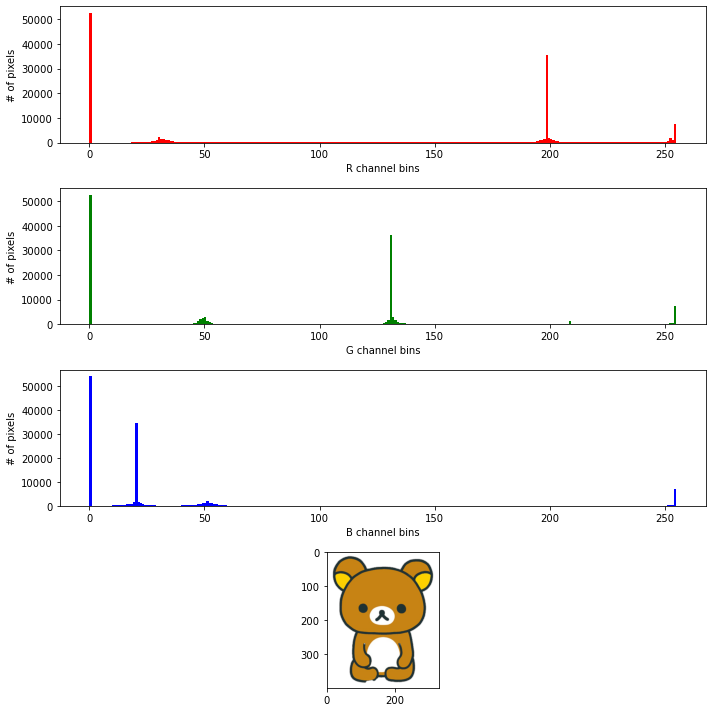

In [22]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im2_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im2_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im2_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im2_data)

fig.tight_layout()
plt.show()

### Image 2 Discussion ###

- The second image is slightly more complex than other two images because this image has an alpha channel. Overall, the second image is about the same as the first one but its brown color is slightly ligher than the first image. This image is composed of brown, yellow, black, white, and its transparent background.

- The histogram of the second image has high frquencies around 0 for all three channels which is interesting to observe. The high frequencies around 0 can be explaied by its tranparent background. Because this image's primary colors are still brownish and yellowish colors, the red and green channels has some values spread out from ~150 to 255. Moreoever, because of the small portion of white color around the nose and belly, there is a short bin around 250 for the blue channel as well.

### Color distribution for Image #3 ###

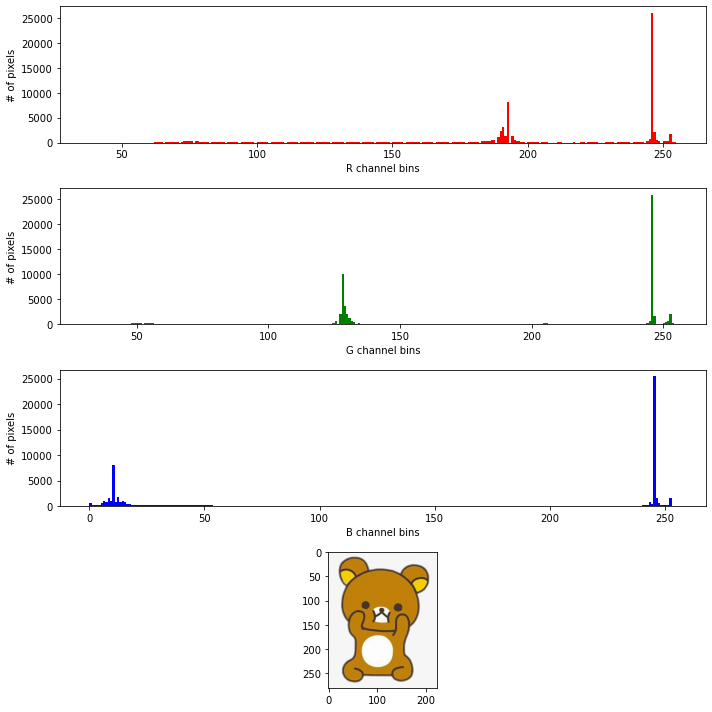

In [23]:
fig, ax = plt.subplots(4,1,figsize=(10,10))
ax[0].hist(im3_data[:,:,0].flatten(), color='red', bins=256)
ax[1].hist(im3_data[:,:,1].flatten(), color='green', bins=256)
ax[2].hist(im3_data[:,:,2].flatten(), color='blue', bins=256)

ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

ax[3].imshow(im3_data)

fig.tight_layout()
plt.show()

### Image 3 Discussion ###

- This images is also a Rilakkuma bear with its body but in a different posture. The overall images has simple colors such as brown, yellow, white, black, and light gray. I would expect a higher frequencies in red and green since brown color is dominating this image.

- When I take a look in the histogram of the color distrubtion, I am kind of surprised by the results because blue channel has several bins that are felatively high (around 0 and 250). The blue channels can be explained by the ligh grayish background color since ligh gray has (211, 211, 211) as its RGB decomposition. Some bins around 200 and 250 in the red channels represent the light yellow and the brown color. For green channel, the high bins around 250 are explaied by the brown color dominance and the few around 125 may be explained by the yellow color.

### A more combined plot ###

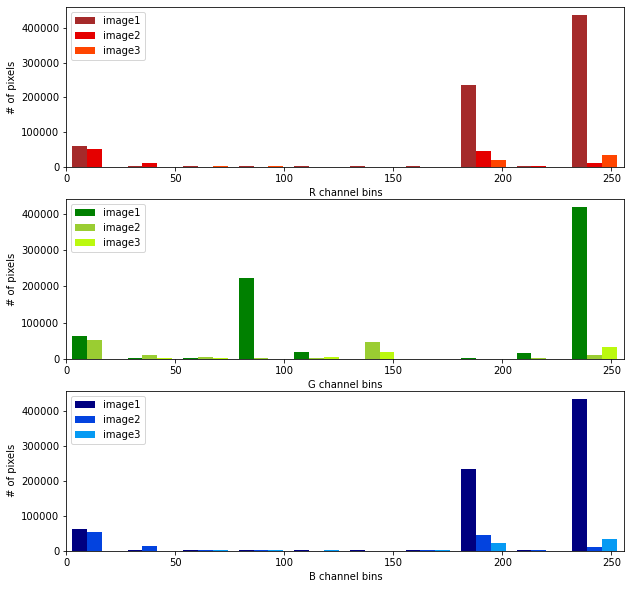

In [24]:
fig, ax = plt.subplots(3,1,figsize=(10,10))

#for red color
ry1 = im1_data[:,:,0].flatten()
ry2 = im2_data[:,:,0].flatten()
ry3 = im3_data[:,:,0].flatten()
red_colors = ['#A52A2A','#E50000', '#FF4500']

ax[0].hist([ry1,ry2,ry3],color=red_colors, label=['image1', 'image2', 'image3'])
ax[0].set_xlim(0,256)
ax[0].legend()

#for green color
gy1 = im1_data[:,:,1].flatten()
gy2 = im2_data[:,:,1].flatten()
gy3 = im3_data[:,:,1].flatten()
green_colors = ['#008000','#9ACD32', '#BBF90F']

ax[1].hist([gy1,gy2,gy3],color=green_colors, label=['image1', 'image2', 'image3'])
ax[1].set_xlim(0,256)
ax[1].legend()

#for blue color
by1 = im1_data[:,:,0].flatten()
by2 = im2_data[:,:,0].flatten()
by3 = im3_data[:,:,0].flatten()
blue_colors = ['#000080','#0343DF', '#069AF3']

ax[2].hist([by1,by2,by3],color=blue_colors, label=['image1', 'image2', 'image3'])
ax[2].set_xlim(0,256)
plt.legend()

#labels
ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

ax[0].set_ylabel('# of pixels')
ax[1].set_ylabel('# of pixels')
ax[2].set_ylabel('# of pixels')

#plt.tight_layout()
plt.show()

### Comparisons Between 3 Images ###

- The most stand out thing of this combined plot is that the bins for the first images are significantly higher than the other 2 images. This is because the first images has more pixels than the other two images. This can be confirmed when all three images are loaded and the first one is significantly bigger than other images. 

- Although all images are Rilakkuma bear and the primary colors are the same, the distribution of RGB channels vary a lot for these three images. Take the bins around 0 for an example, the third image does not have a lot of bins around 0 for all three channels while the first and the second images have some bins around 0. Moreover, the first image has an out-standing green bin around 80. 

- Overall, the distribution among all three images are similar not including the height of the bins. They all have some small bins around 0 and 250 and some other tiny bins spread out on the scale. The first two image are more similar to each other when just looking at the bins around 0 and they significantly vary from the distribution around 250. The second image is the most unique one since it has a transparent background.